Advertising Sales Channel Prediction

Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df= pd.read_csv('Advertising.csv')

In [3]:
#display head of data
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#drop unecessory data
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
#checking shape of data
df.shape

(200, 4)

In [6]:
#checking informaion of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
#checking fpr null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

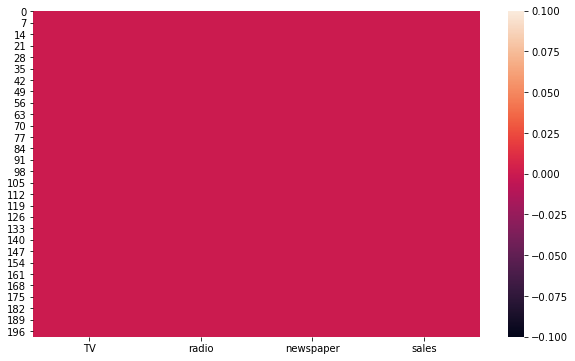

In [8]:
#plotting heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.show()

In [9]:
#describing the data
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# EDA

<AxesSubplot:>

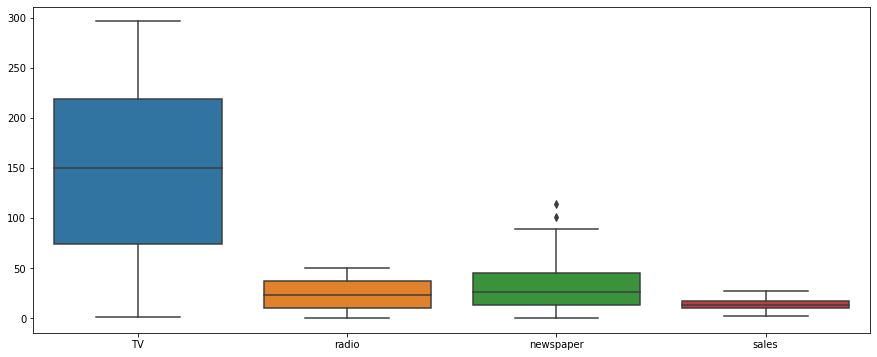

In [10]:
#checking the data valuation
plt.figure(figsize=(15,6))
sns.boxplot(data=df)

some outliers are present

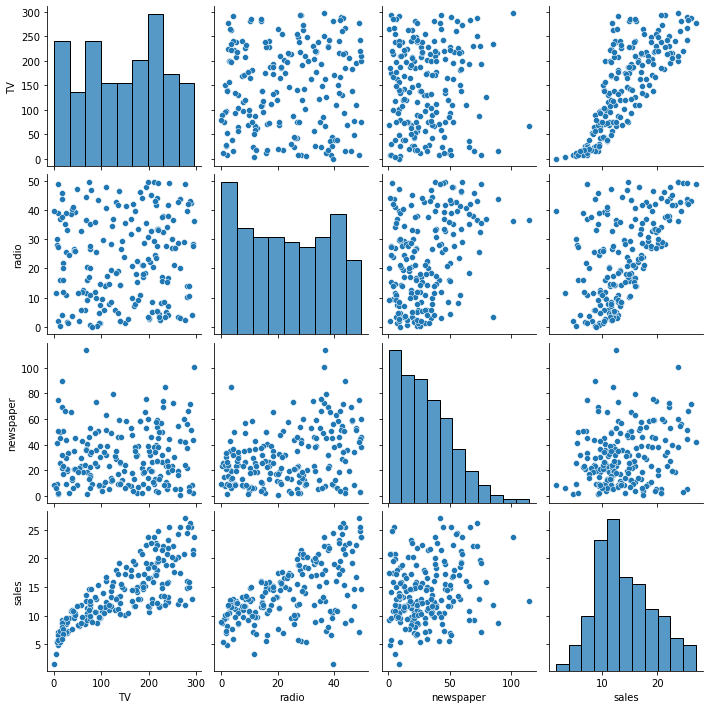

In [11]:
#multy variate analysis
sns.pairplot(data=df)

In [12]:
#checking correlation of columns
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

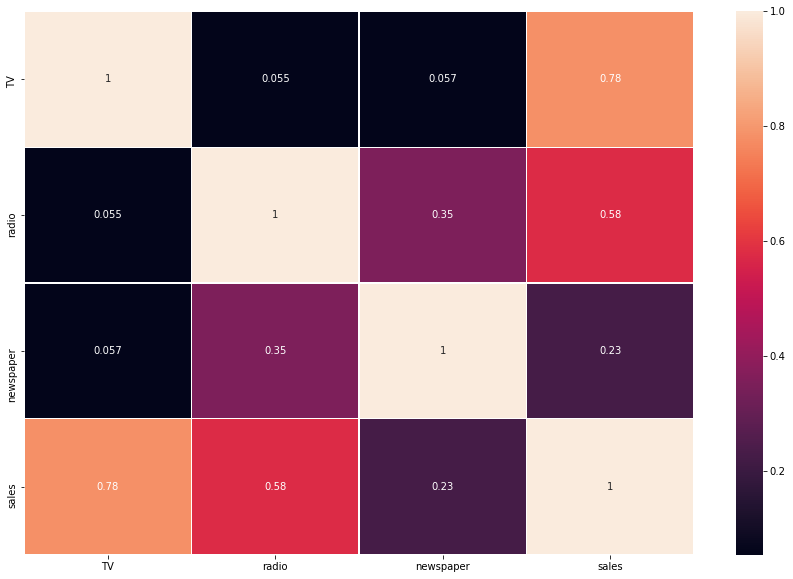

In [13]:
#checking correlation using matrix
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.1)

sales is more related with tv as compared to others

TV


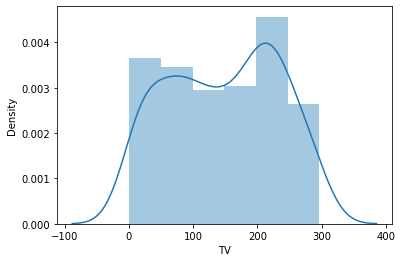

radio


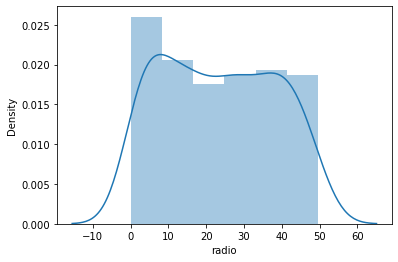

newspaper


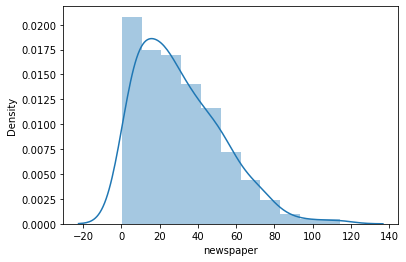

sales


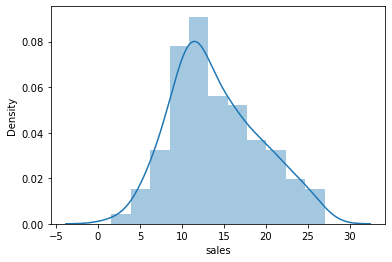

In [14]:
#checking skewness in the columns
for col in df:
    print(col)
    sns.distplot(df[col])
    plt.show()

In [15]:
#skewness
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [16]:
#splitting the data
x= df.drop('sales',axis=1)
y=df['sales']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [18]:
#train the model
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=199)

In [19]:
#checking new shape
x_test.shape

(50, 3)

In [20]:
y_test.shape

(50,)

In [21]:
#getting the r2 score and pred using linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
r2=r2_score(y_test,pred)
print('r2 score is ',r2)

r2 score is  0.8565135936400855


In [22]:
#checking cross validation score
from sklearn.model_selection import cross_val_score

cvs= cross_val_score(lr,x,y,cv=5)
print('cross validation score is ',cvs.mean())

cross validation score is  0.8871063495438435


In [23]:
#getting the r2 score and pred using decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred= dtr.predict(x_test)
r2 = r2_score(y_test,pred)
print('r2score is ',r2)

r2score is  0.9272858916011585


In [24]:
#checking cross validation score
cvs= cross_val_score(dtr,x,y,cv=5)
print('cross validation score is ',cvs.mean())

cross validation score is  0.9543987541423438


In [25]:
#getting the r2 score and pred using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred= rfr.predict(x_test)
r2 = r2_score(y_test,pred)
print('r2score is ',r2)

r2score is  0.9648741130533722


In [26]:
#checking cross validation score
cvs= cross_val_score(rfr,x,y,cv=5)
print('cross validation score is ',cvs.mean())

cross validation score is  0.9757272785241442


In [27]:
#getting the r2 score and pred using support victor regressor
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train,y_train)
pred= svr.predict(x_test)
r2 = r2_score(y_test,pred)
print('r2score is ',r2)

r2score is  0.83531567787332


In [28]:
#checking cross validation score
cvs= cross_val_score(svr,x,y,cv=5)
print('cross validation score is ',cvs.mean())

cross validation score is  0.8404415171122854


In [29]:
#getting the r2 score and pred using KNeighbors Regressor
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred= knn.predict(x_test)
r2 = r2_score(y_test,pred)
print('r2score is ',r2)

r2score is  0.9251630809543512


In [30]:
#checking cross validation score
cvs= cross_val_score(knn,x,y,cv=5)
print('cross validation score is ',cvs.mean())

cross validation score is  0.9085710686189529


In [31]:
#getting the r2 score and pred using Ada Boost Regressor
from sklearn.ensemble import AdaBoostRegressor

ada= AdaBoostRegressor()
ada.fit(x_train,y_train)
pred= ada.predict(x_test)
r2 = r2_score(y_test,pred)
print('r2score is ',r2)

r2score is  0.9432315195983532


In [32]:
#checking cross validation score
cvs= cross_val_score(ada,x,y,cv=5)
print('cross validation score is ',cvs.mean())

cross validation score is  0.9540965883648915


the best fit model is random forest regressor now we shall proceed with this

In [33]:
#saving the model
import joblib
joblib.dump(rfr,'sales_pred.pkl')

['sales_pred.pkl']

In [34]:
#loading the model
model = joblib.load('sales_pred.pkl')

In [35]:
#fitting into the dataframe
pred = model.predict(x_test)

In [36]:
#using the model for prediction
predict= pd.DataFrame(pred)
predict.to_csv('Result.csv')

In [37]:
#predicted prices
predict

,0
0,16.652
1,16.024
2,13.229
3,10.597
4,13.017
5,21.765
6,18.176
7,9.586
8,9.703
9,15.672
